# k-Means

## Exercise 1
k-Means on two-dimensional data with cluster separators

For the dataset below, plot the clusters and the centroids of the k-means algorithm for each iteration until convergence. The initial centroids will be the points A, D and G (therefore the algorithm will find 3 clusters). Include in each plot the Voronoi diagram for the centroids, to highlight the cluster separation.

In [1]:
import pandas as pd
data = {
    'A':[2, 10], 'B':[2, 5], 'C':[8, 4], 'D':[5, 8], 
    'E':[7, 5], 'F':[6, 4],  'G':[1, 2], 'H':[4, 9]
}
d = pd.DataFrame.from_dict(data, orient='index', columns=['X', 'Y'])

## Exercise 2
k-Means on two-dimensional data

For the dataset below and the initial centroids A, D and G, independently implement the k-Means algorithm (i.e. do not use the one from `sklearn`) and plot the clusters and centroids for each iteration.

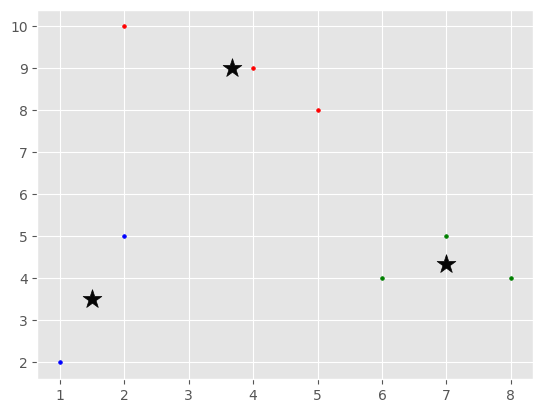

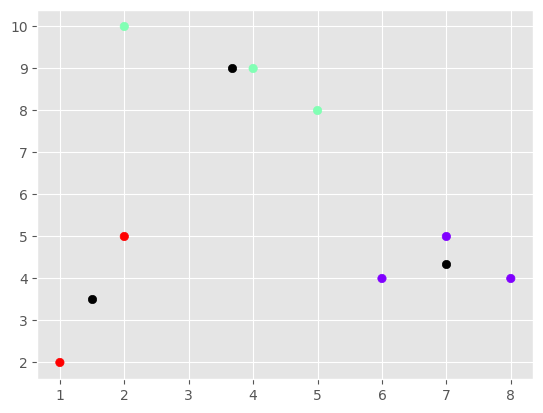

In [20]:
"""
## Exercise 2
k-Means on two-dimensional data

For the dataset below and the initial centroids A, D and G, 
independently implement the k-Means algorithm (i.e. do not use the one from `sklearn`) 
and plot the clusters and centroids for each iteration.
"""

import pandas as pd
data = {
    'A':[2, 10], 'B':[2, 5], 'C':[8, 4], 'D':[5, 8], 
    'E':[7, 5], 'F':[6, 4],  'G':[1, 2], 'H':[4, 9]
}
d = pd.DataFrame.from_dict(data, orient='index', columns=['X', 'Y'])

# solution here:
import numpy as np
import matplotlib.pyplot as plt

def plot_clusters(X, centroids, clusters):
    colors = ['r', 'g', 'b']
    fig, ax = plt.subplots()
    for i in range(3):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')
    plt.show()

def kmeans(X, k=3, max_iters=100):
    centroids = X[np.random.choice(range(len(X)), k)]
    for _ in range(max_iters):
        clusters = np.array([np.argmin([euclidean_distance(x, centroid) for centroid in centroids]) for x in X])
        centroids = [X[clusters == i].mean(axis=0) for i in range(k)]
    return np.array(centroids), clusters

centroids, clusters = kmeans(d.values, 3)
plot_clusters(d.values, centroids, clusters)

# plot using sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(d.values)

plt.scatter(d.values[:,0], d.values[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.show()

## Exercise 3
k-Means on an external dataset with starting centroids

Apply k-means on this [two-dimensional dataset](https://profs.info.uaic.ro/~ciortuz/ML.ex-book/res/CMU.2004f.TM+AM.HW3.pr5.cl.dat) using these [starting centroids](https://profs.info.uaic.ro/~ciortuz/ML.ex-book/res/CMU.2004f.TM+AM.HW3.pr5.init.dat). Plot the clusters and centroids after each iteration until convergence. What is unusual about about the first iteration?

## Exercise 4
Anisotropically distributed data

Run the k-means algorithm for the datasets `d1` and `d2` with $k=3$ and the default parameters. 
1. Plot the resulting clusters.
1. Which clusters look more 'natural' and why?

In [3]:
from sklearn.datasets import make_blobs
import numpy as np

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
# Anisotropically distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
anis = np.dot(X, transformation)
# Compare these datasets
d1, d2 = X, anis

## Exercise 5
k-means and noise

Considering the dataset `d` below and two sets of starting centroids `c1` and `c2`.

1. Run k-means ($k=3$ and the default parameters), first starting with `c1` and then starting with `c2`. (You might want to also use `n_init=1` to prevent a warning.)
1. Plot the resulting clusters for each of the two runs.
1. In which of the two runs the clusters look more 'natural' and why?

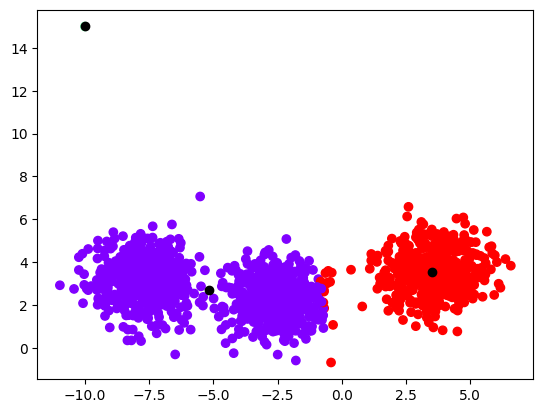

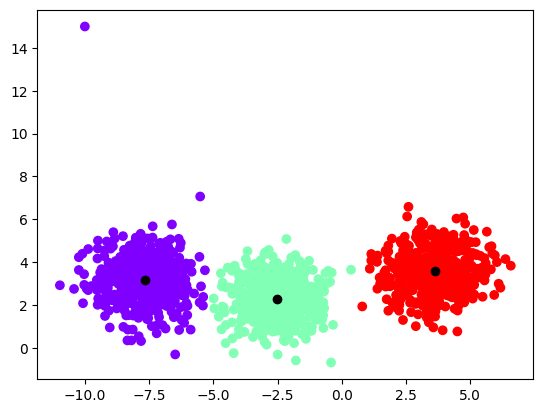

3. In which of the two runs the clusters look more 'natural' and why?
The second one, because the centroids are closer to the clusters.


In [8]:
"""
## Exercise 5
k-means and noise

Considering the dataset `d` below and two sets of starting centroids `c1` and `c2`.

1. Run k-means ($k=3$ and the default parameters), first starting with `c1` and then starting with `c2`. (You might want to also use `n_init=1` to prevent a warning.)
2. Plot the resulting clusters for each of the two runs.
3. In which of the two runs the clusters look more 'natural' and why?
"""

from sklearn.datasets import make_blobs
import numpy as np

n_samples = 1500
random_state = 110
d, _ = make_blobs(n_samples=n_samples, random_state=random_state)
# Dataset
d = np.append(d, [[-10, 15]], axis=0)
# Starting centroids
c1 = np.array([[-6, 2], [-10, 15], [3, 3]])
c2 = np.array([[-10, 3], [-2, 2], [3, 3]])

# solution here:

# 1. Run k-means ($k=3$ and the default parameters), first starting with `c1` and then starting with `c2`. (You might want to also use `n_init=1` to prevent a warning.)
from sklearn.cluster import KMeans
kmeansC1 = KMeans(n_clusters=3, random_state=0, n_init=1, init=c1).fit(d)
kmeansC2 = KMeans(n_clusters=3, random_state=0, n_init=1, init=c2).fit(d)

# 2. Plot the resulting clusters for each of the two runs.
import matplotlib.pyplot as plt
plt.scatter(d[:,0], d[:,1], c=kmeansC1.labels_, cmap='rainbow')
plt.scatter(kmeansC1.cluster_centers_[:,0] ,kmeansC1.cluster_centers_[:,1], color='black')
plt.show()

plt.scatter(d[:,0], d[:,1], c=kmeansC2.labels_, cmap='rainbow')
plt.scatter(kmeansC2.cluster_centers_[:,0] ,kmeansC2.cluster_centers_[:,1], color='black')
plt.show()

# 3. In which of the two runs the clusters look more 'natural' and why?
print("3. In which of the two runs the clusters look more 'natural' and why?")
print("The second one, because the centroids are closer to the clusters.")
